In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [11]:
file_path = "/Users/arjun/Downloads/Pharmacy_OLTP_SLStyle_18Months.csv"
sales = pd.read_csv(file_path)
sales.head()
print("Total rows:", len(sales))

Total rows: 50000


In [34]:
print(sales.columns.tolist())  # List of all column names
print("\nNumber of columns:", len(sales.columns))
num_cols = len(sales.columns)

['Transaction_ID', 'Transaction_Date', 'Branch_ID', 'Branch_Name', 'District', 'Province', 'Payment_Method', 'Customer_Gender', 'Customer_Age', 'Customer_City', 'Medicine_ID', 'Medicine_Name', 'Generic_Name', 'Medicine_Category', 'Dosage_Form', 'Strength_mg', 'Pack_Size', 'Supplier_Name', 'Prescription_Required', 'Batch_No', 'Expiry_Date', 'Quantity', 'Unit_Price_LKR', 'Discount_Rate', 'Line_Total_LKR', 'Year', 'Month']

Number of columns: 27


**EDA**

In [43]:
#null value check
print(sales.isnull().sum()) #results shows Strength_mg has 31236 null values

print((sales.isnull().sum() / len(sales) * 100).round(2))
#62.47 % null values in that one colomn only

Transaction_ID               0
Transaction_Date             0
Branch_ID                    0
Branch_Name                  0
District                     0
Province                     0
Payment_Method               0
Customer_Gender              0
Customer_Age                 0
Customer_City                0
Medicine_ID                  0
Medicine_Name                0
Generic_Name                 0
Medicine_Category            0
Dosage_Form                  0
Strength_mg              31236
Pack_Size                    0
Supplier_Name                0
Prescription_Required        0
Batch_No                     0
Expiry_Date                  0
Quantity                     0
Unit_Price_LKR               0
Discount_Rate                0
Line_Total_LKR               0
Year                         0
Month                        0
dtype: int64
Transaction_ID            0.00
Transaction_Date          0.00
Branch_ID                 0.00
Branch_Name               0.00
District                  

In [42]:
#duplicate check
print("Duplicate rows:", sales.duplicated().sum())


Duplicate rows: 0


In [45]:
print(sales.describe())

       Transaction_ID            Transaction_Date     Branch_ID  Customer_Age  \
count    50000.000000                       50000  50000.000000  50000.000000   
mean     25000.500000  2022-09-30 02:25:10.848000      4.001940     48.915940   
min          1.000000         2022-01-01 00:00:00      1.000000     18.000000   
25%      12500.750000         2022-05-17 00:00:00      2.000000     33.000000   
50%      25000.500000         2022-09-30 00:00:00      4.000000     49.000000   
75%      37500.250000         2023-02-13 00:00:00      6.000000     65.000000   
max      50000.000000         2023-06-30 00:00:00      7.000000     80.000000   
std      14433.901067                         NaN      2.004319     18.159583   

        Medicine_ID   Strength_mg     Pack_Size      Quantity  Unit_Price_LKR  \
count  50000.000000  18764.000000  50000.000000  50000.000000    50000.000000   
mean      74.543920    350.273129     35.769760      3.000780     1878.785603   
min        1.000000     50.

In [49]:
print(sales[sales['Strength_mg'].isnull()]['Dosage_Form'].value_counts())

Dosage_Form
Cream       7982
Sachet      6320
Inhaler     5814
Ointment    5741
Syrup       5379
Name: count, dtype: int64


In [48]:
print(sales[sales['Strength_mg'].notnull()]['Dosage_Form'].value_counts())

Dosage_Form
Capsule    8103
Tablet     5616
Drops      5045
Name: count, dtype: int64


In [51]:
#Strength_mg is not really needed to answer our business question, so i am dropping it for more clean dataset
sales.drop(columns=['Strength_mg'], inplace=True)
print(sales.dtypes)


Transaction_ID                    int64
Transaction_Date         datetime64[ns]
Branch_ID                         int64
Branch_Name                      object
District                         object
Province                         object
Payment_Method                   object
Customer_Gender                  object
Customer_Age                      int64
Customer_City                    object
Medicine_ID                       int64
Medicine_Name                    object
Generic_Name                     object
Medicine_Category                object
Dosage_Form                      object
Pack_Size                         int64
Supplier_Name                    object
Prescription_Required            object
Batch_No                         object
Expiry_Date                      object
Quantity                          int64
Unit_Price_LKR                  float64
Discount_Rate                   float64
Line_Total_LKR                  float64
Year                              int64


In [54]:
#check for unique values in categorical colomns

cat_cols = ["Branch_Name", "Medicine_Category", "Payment_Method","Customer_Gender", "Prescription_Required",
            "Supplier_Name", "Dosage_Form", "Province"]
for col in cat_cols:
    print(f"\n{col} ({sales[col].nunique()} unique):")
    print(sales[col].value_counts())


Branch_Name (7 unique):
Branch_Name
Pharmacy - Colombo Fort    7247
Pharmacy - Kurunegala      7236
Pharmacy - Ratnapura       7201
Pharmacy - Jaffna          7160
Pharmacy - Galle           7104
Pharmacy - Negombo         7041
Pharmacy - Kandy City      7011
Name: count, dtype: int64

Medicine_Category (15 unique):
Medicine_Category
Antibiotic      7632
Cardiac         6499
Painkiller      5008
Vitamin         4873
Cough & Cold    4088
Gastro          3436
Diabetes        3377
Dermatology     3363
First Aid       2707
Hormonal        2363
Allergy         2034
Antiviral       1627
Respiratory     1301
Antifungal      1047
Wellness         645
Name: count, dtype: int64

Payment_Method (3 unique):
Payment_Method
Cash         22652
Card         19886
Insurance     7462
Name: count, dtype: int64

Customer_Gender (2 unique):
Customer_Gender
Female    25877
Male      24123
Name: count, dtype: int64

Prescription_Required (2 unique):
Prescription_Required
No     27455
Yes    22545
Name: coun

In [57]:
#numerical colomn range check
num_cols = ["Customer_Age", "Quantity", "Unit_Price_LKR","Discount_Rate", "Line_Total_LKR"]
for col in num_cols:
    print(f"{col}: min={sales[col].min()}, max={sales[col].max()}, mean={sales[col].mean():.2f}")


Customer_Age: min=18, max=80, mean=48.92
Quantity: min=1, max=5, mean=3.00
Unit_Price_LKR: min=26.24, max=4499.41, mean=1878.79
Discount_Rate: min=0.0, max=0.15, mean=0.07
Line_Total_LKR: min=29.34, max=21933.45, mean=5205.64


**EDA plots**

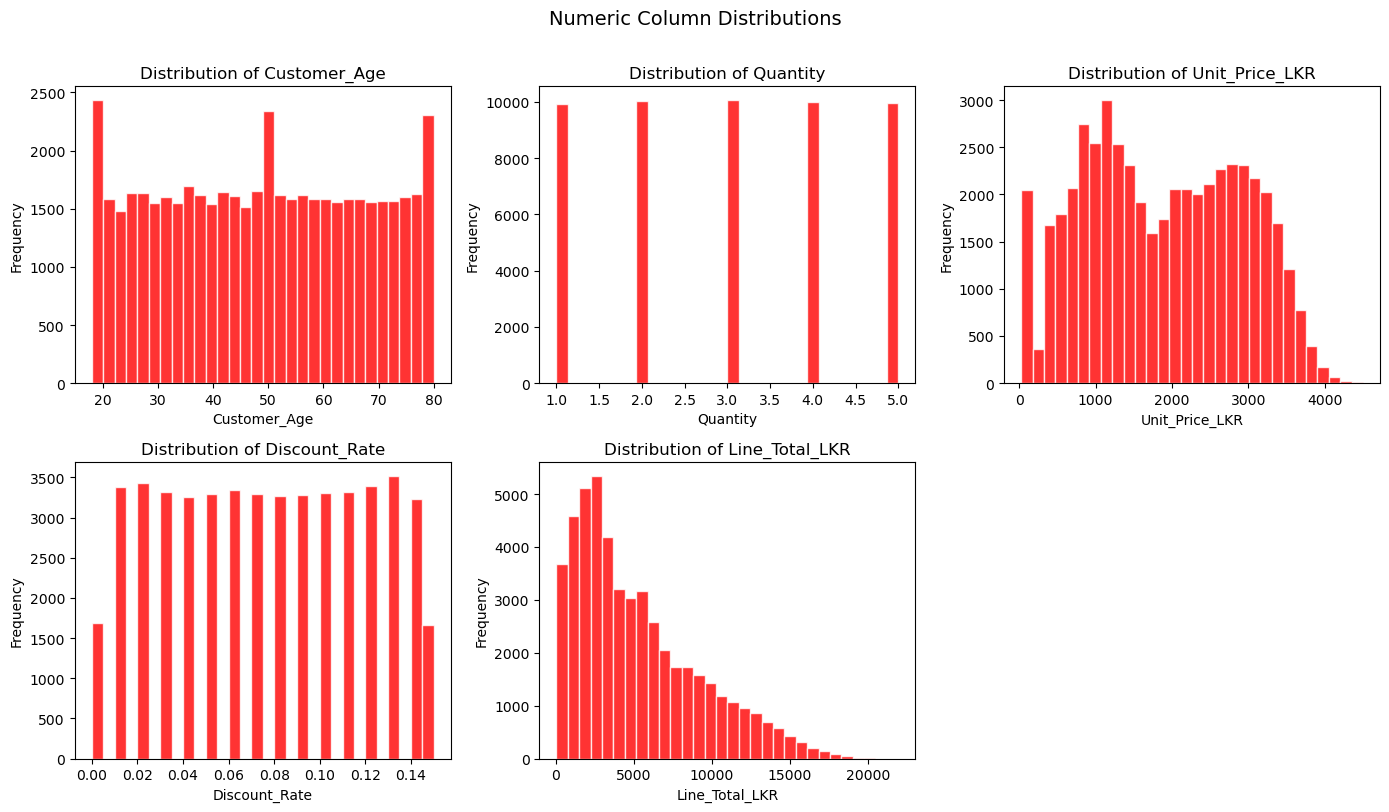

In [69]:
#numerical colomns 


fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(sales[col].dropna(), bins=30, color="red",
                 edgecolor="white", alpha=0.8)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

axes[5].set_visible(False)

plt.suptitle("Numeric Column Distributions", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

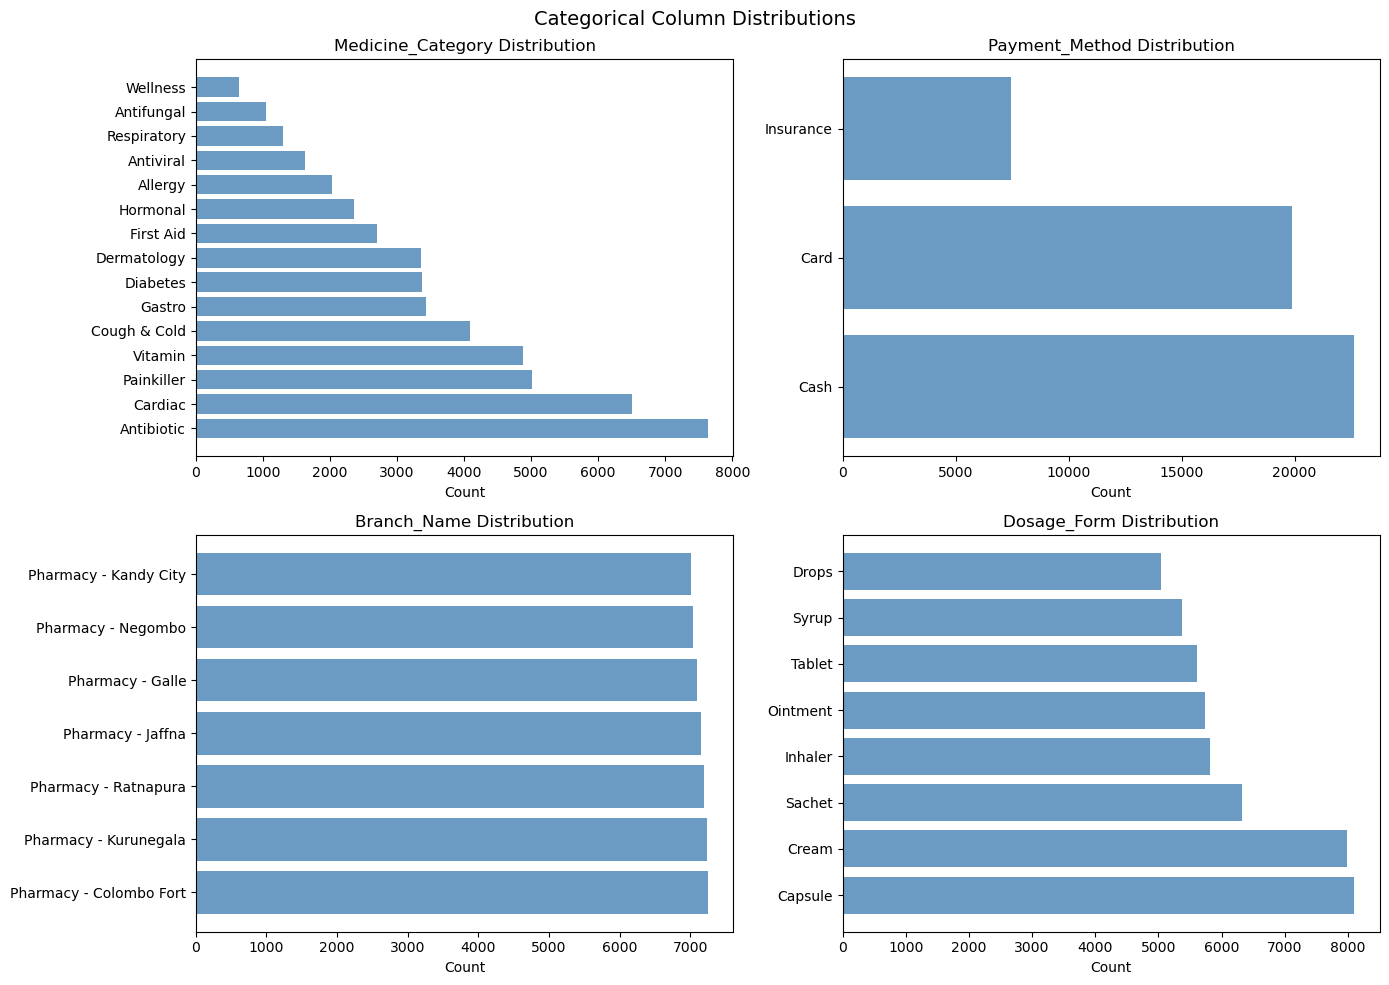

In [64]:
#cateforical colomns EDA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(["Medicine_Category", "Payment_Method","Branch_Name", "Dosage_Form"]):
    counts = sales[col].value_counts()
    axes[i].barh(counts.index, counts.values, color="steelblue", alpha=0.8)
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("Count")

plt.suptitle("Categorical Column Distributions", fontsize=14)
plt.tight_layout()
plt.show()

**correlation check**

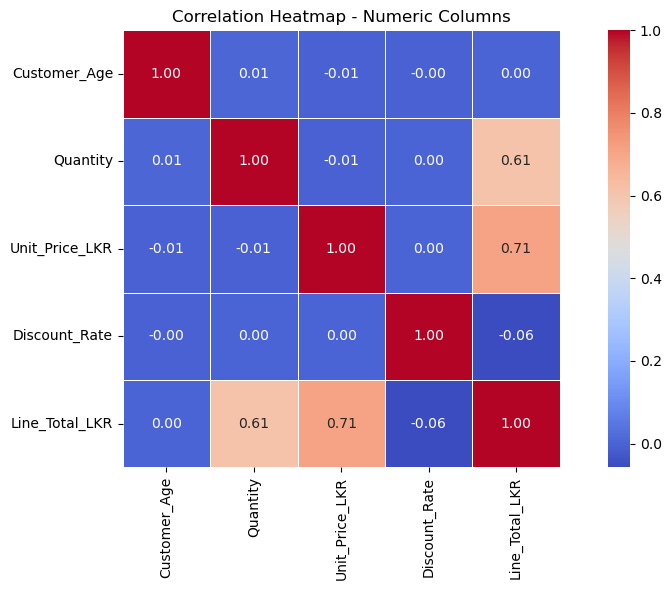

In [67]:
plt.figure(figsize=(10, 6))
correlation = sales[num_cols].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm",linewidths=0.5, square=True)
plt.title("Correlation Heatmap - Numeric Columns")
plt.tight_layout()
plt.show()

In [73]:
#colomn addition for better usage of data
sales["Expiry_Date"] = pd.to_datetime(sales["Expiry_Date"], errors="coerce") #format change
sales["Day_of_Week"] = sales["Transaction_Date"].dt.day_name() #new colomn addition
sales["Quarter"] = "Q" + sales["Transaction_Date"].dt.quarter.astype(str) 
sales["Month_Name"] = sales["Transaction_Date"].dt.strftime("%b")
sales["Days_to_Expiry"] = (sales["Expiry_Date"] - sales["Transaction_Date"]).dt.days

bins   = [0,  30,  45,  60,  100]
labels = ["Young (18-30)", "Middle (31-45)", "Senior (46-60)", "Elderly (61+)"]
sales["Age_Group"] = pd.cut(sales["Customer_Age"], bins=bins,labels=labels, right=True)

sales["Branch_Short"] = sales["Branch_Name"].str.replace("Pharmacy - ", "",regex=False)


**Time Series Revenue Trend**

In [16]:
sales["Transaction_Date"] = pd.to_datetime(sales["Transaction_Date"])

#grouping transaction date based on month
monthly = sales.groupby(sales["Transaction_Date"].dt.to_period("M"))["Line_Total_LKR"].sum()
monthly.index = monthly.index.to_timestamp()


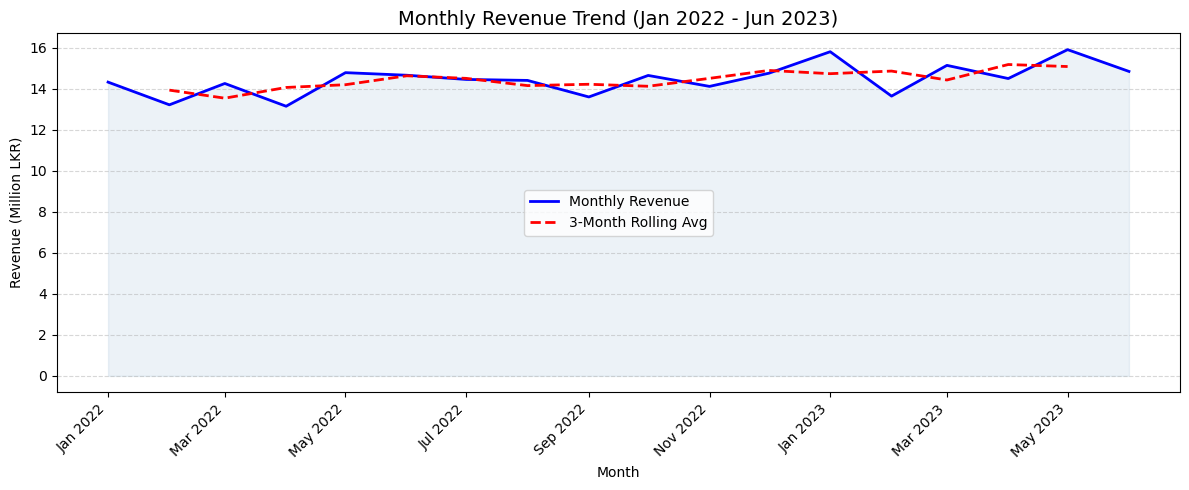

In [31]:
rolling_avg = monthly.rolling(window=3, center=True).mean() #rolling average calculation for 3 consecutive month together, center : plotted at middle
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(monthly.index, monthly.values / 1e6, color="blue", linewidth=2, label="Monthly Revenue")
ax.plot(monthly.index, rolling_avg.values / 1e6,color="red", linewidth=2, linestyle="--", label="3-Month Rolling Avg")
#fill area under the line
ax.fill_between(monthly.index, monthly.values / 1e6, alpha=0.1, color="steelblue")

#formating axis
plt.xticks(rotation=45, ha="right")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

#labels
ax.set_title("Monthly Revenue Trend (Jan 2022 - Jun 2023)", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue (Million LKR)")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

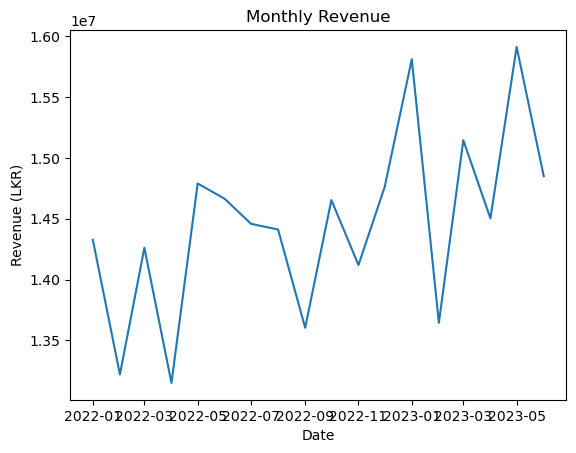

In [20]:
#plot
plt.plot(monthly.index, monthly.values)
plt.title("Monthly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (LKR)")
plt.show()